## ASBD LAB 5 - CED19I027 - N. SREE DHYUTI

In [2]:
# CED19I027 - N. SREE DHYUTI - ASBD LAB5

# Import Required Libraries
import pandas as pd
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill
import squarify
import stemgraphic
import plotly.graph_objects as go  
import plotly.express as px
import scipy.stats as stats

**DATA PREPROCESSING (Part – 2)**


## 1. Select a subset of relevant attributes from the given dataset that are necessary to know about the total volume of avocados with product lookup codes (PLU) 4046, 4225, 4770) which are of organic type. (Use AVOCADO dataset)


**Load Data**

In [3]:
data_avacado = pd.read_csv(r"Avocado Dataset.csv")
data_avacado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
req_attributes = ["Total Volume", "4046", "4225", "4770", "type"]

print("subset of relevant attributes to know about the total volume of avocados with product lookup codes (PLU) 4046, 4225, 4770) \nwhich are of organic type")
data_avacado[req_attributes]

subset of relevant attributes to know about the total volume of avocados with product lookup codes (PLU) 4046, 4225, 4770) 
which are of organic type


,Total Volume,4046,4225,4770,type
0,64236.62,1036.74,54454.85,48.16,conventional
1,54876.98,674.28,44638.81,58.33,conventional
2,118220.22,794.70,109149.67,130.50,conventional
3,78992.15,1132.00,71976.41,72.58,conventional
4,51039.60,941.48,43838.39,75.78,conventional
...,...,...,...,...,...
18245,13888.04,1191.70,3431.50,0.00,organic
18246,13766.76,1191.92,2452.79,727.94,organic
18247,16205.22,1527.63,2981.04,727.01,organic
18248,17489.58,2894.77,2356.13,224.53,organic


## Inference:
- Attributes "Total Volume", "4046", "4225", "4770" and "type" are sufficient to find total volumes of avacados with PLU values 4046, 4225 and 4770

- Volume of avacados with PLU value '4046' = ((#Avacados in 4046) / (#Avacados in 4225))*(Total Volume)

## 2. Discard all duplicate entries in the dataset given and fill all the missing values in the attribute “AveragePrice” as 1.25. Also print the size of the dataset before and after removing duplicates. (Use Trail dataset)

In [5]:
data_trail = pd.read_csv(r"Trail.csv.")
data_trail

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,22-11-2015,NaN,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
4,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,20-09-2015,NaN,498640.23,4376.74,398673.48,418.46,95171.55,91612.66,3558.89,0.0,conventional,2015,Boston
198,13-09-2015,NaN,655682.95,5422.29,560792.23,353.77,89114.66,84843.55,4271.11,0.0,conventional,2015,Boston
199,06-09-2015,NaN,577774.74,4237.44,477867.83,496.62,95172.85,94558.41,614.44,0.0,conventional,2015,Boston
200,30-08-2015,NaN,526664.87,4177.03,438502.90,554.04,83430.90,83242.01,188.89,0.0,conventional,2015,Boston


**After Removing Duplicates**

In [6]:
no_duplicates = data_trail.drop_duplicates()
no_duplicates

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,22-11-2015,NaN,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
5,13-12-2015,1.21,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,organic,2015,xxxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,20-09-2015,NaN,498640.23,4376.74,398673.48,418.46,95171.55,91612.66,3558.89,0.0,conventional,2015,Boston
198,13-09-2015,NaN,655682.95,5422.29,560792.23,353.77,89114.66,84843.55,4271.11,0.0,conventional,2015,Boston
199,06-09-2015,NaN,577774.74,4237.44,477867.83,496.62,95172.85,94558.41,614.44,0.0,conventional,2015,Boston
200,30-08-2015,NaN,526664.87,4177.03,438502.90,554.04,83430.90,83242.01,188.89,0.0,conventional,2015,Boston


In [7]:
missing_values = ["NA", "nil", "N/A", "n/a", "na", "null", "NAN", "nan", "NaN", ""]
for i in data_trail.index:
    if data_trail[data_trail.columns[1]][i] in missing_values or (pd.isnull(data_trail.loc[i, data_trail.columns[1]])):
        data_trail.at[i,'AveragePrice']= 1.25
        
print("Data after filling missing values in AveragePrice as 1.25:")
data_trail

Data after filling missing values in AveragePrice as 1.25:


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,22-11-2015,1.250000,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
4,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,20-09-2015,1.250000,498640.23,4376.74,398673.48,418.46,95171.55,91612.66,3558.89,0.0,conventional,2015,Boston
198,13-09-2015,1.250000,655682.95,5422.29,560792.23,353.77,89114.66,84843.55,4271.11,0.0,conventional,2015,Boston
199,06-09-2015,1.250000,577774.74,4237.44,477867.83,496.62,95172.85,94558.41,614.44,0.0,conventional,2015,Boston
200,30-08-2015,1.250000,526664.87,4177.03,438502.90,554.04,83430.90,83242.01,188.89,0.0,conventional,2015,Boston


In [8]:
print(f"Size Before removing Duplicates: {data_trail.size}")
print(f"Size After removing Duplicates: {no_duplicates.size}")

Size Before removing Duplicates: 2626
Size After removing Duplicates: 2535


## 3. Binarize the attribute “Year”. Set the threshold above 2016 and print it without truncation. (Use AVOCADO dataset)


In [9]:
threshold = 2016
        
# # Binning of the data based on a condition
# data_avacado.loc[data_avacado.year <=2016, 'Condition'] = 0
# data_avacado.loc[data_avacado.year > 2016, 'Condition'] = 1
 
# # Grouping and couting
# data_avacado.groupby('Condition').count()

# before2016 = data_avacado.query('year <= 2016')
# after2016 = data_avacado.query('year > 2016')

binarize = []
for i in data_avacado.index:
    if data_avacado['year'][i] <= 2016:
        binarize.append(0)
    else:
        binarize.append(1)

data_avacado['Binary Value'] = binarize
print("After Binarization:\n")
data_avacado

After Binarization:



,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Binary Value
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1


In [10]:
# print("Before 2016:")
# before2016

In [11]:
# print("After 2016")
# after2016

## 4. Transform all categorical attributes in the dataset AVOCADO using Integer Encoding.

In [12]:
print("Details of all the attributes in Avacado Dataset:")
data_avacado.dtypes

Details of all the attributes in Avacado Dataset:


Date             object
AveragePrice     object
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Binary Value      int64
dtype: object

In [13]:
from sklearn.preprocessing import OrdinalEncoder

# prepare input data
def integer_encoding(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_train_enc = oe.transform(X)
    return X_train_enc

int_encoding = integer_encoding(data_avacado[["type", "year", "region"]])

print("After Integer Encoding, Data is as follows:\n")
print(int_encoding)
# int_encoding

After Integer Encoding, Data is as follows:

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 ...
 [ 1.  3. 53.]
 [ 1.  3. 53.]
 [ 1.  3. 53.]]


## 5. Transform the attribute = “Region” in the given dataset AVOCADO using One-Hot Encoding.

In [14]:
region = data_avacado["region"]


one_hot_encoded_data = pd.get_dummies(data_avacado, columns = ['region'])
print("After One Hot Encoding:")
one_hot_encoded_data

After One Hot Encoding:


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0,0,0,0,0,0,0,0,0,1
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0,0,0,0,0,0,0,0,0,1
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,...,0,0,0,0,0,0,0,0,0,1


## 6. Ignore the tuples that hold missing values and print the subset of data from AVOCADO dataset excluding “NaN” values.


In [15]:
# indices = []
# missing_values = ["NA", "nil", "N/A", "n/a", "na", "null", "NAN", "nan", "NaN", ""]
# for i in data_avacado.index:
#     for j in data_avacado.columns:
#         if data_avacado[data_avacado.columns[1]][i] in missing_values or (pd.isnull(data_avacado.loc[i, data_avacado.columns[1]])):
#             if i not in indices:
#                 indices.append(int(i))
# print(indices)
# for i in range(len(indices)):
#     update_df = data_avacado.drop(np.array(indices), axis=0, inplace=True)


data_avacado.dropna(axis=0)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Binary Value
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1


## 7. Drop the attribute that has high nullity as it facilitates efficient prediction. (Use AVOCADO dataset)

In [16]:
data_avacado.dropna(axis=1,how='any',inplace=True)
data_avacado.isnull().sum()

Date            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Binary Value    0
dtype: int64

## 8. Study the entire dataset and report the complete statistical summary about the data (Use AVOCADO dataset)

**Avacado Dataset Description**
**Attributes in the dataset:**
-  Date - The date of the observation
- Average Price - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU* 4046 sold
- 4225 - Total number of avocados with PLU* 4225 sold
- 4770 - Total number of avocados with PLU* 4770 sold

In [17]:
data_avacado = pd.read_csv(r"Avocado Dataset.csv")
data_avacado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


- Dimension of the dataset

In [18]:
data_avacado.shape

(18250, 13)

- Most frequently occurring value under every attribute.

In [19]:
print("Most Frequently Occueing Attribute")
for i in data_avacado.columns:
    print(f"Attribute: {i}\nMode: {statistics.mode(data_avacado[i])}\n\n")

Most Frequently Occueing Attribute
Attribute: Date
Mode: 18-03-2018


Attribute: AveragePrice
Mode: 1.15


Attribute: Total Volume
Mode: 569349.05


Attribute: 4046
Mode: 0.0


Attribute: 4225
Mode: 0.0


Attribute: 4770
Mode: 0.0


Attribute: Total Bags
Mode: 0.0


Attribute: Small Bags
Mode: 0.0


Attribute: Large Bags
Mode: 0.0


Attribute: XLarge Bags
Mode: 0.0


Attribute: type
Mode: conventional


Attribute: year
Mode: 2017


Attribute: region
Mode: Albany




- Datatype of every attribute

In [20]:
data_avacado.dtypes

Date             object
AveragePrice     object
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- Count

In [21]:
data_avacado.count()

Date            18250
AveragePrice    18222
Total Volume    18250
4046            18250
4225            18250
4770            18250
Total Bags      18250
Small Bags      18250
Large Bags      18250
XLarge Bags     18250
type            18250
year            18250
region          18250
dtype: int64

- Mean

In [22]:
# Clean the column named AveragePrice

columns_exclude = ["Date", "type", "year", "region"]
for i in data_avacado.columns:
    if(i not in columns_exclude):
        data = [val for val in data_avacado[i] if isinstance(val, (int, float))]
        print(f"Attribute: {i}\nMean: {statistics.mean(data)}\n\n")
    else:
        print(f"Attribute: {i}\nIt is irrelevant to find Mean for this attribute\n\n")

Attribute: Date
It is irrelevant to find Mean for this attribute


Attribute: AveragePrice
Mean: nan


Attribute: Total Volume
Mean: 850598.2734126027


Attribute: 4046
Mean: 292992.48189643834


Attribute: 4225
Mean: 295138.477670137


Attribute: 4770
Mean: 22838.48450027397


Attribute: Total Bags
Mean: 239626.747390137


Attribute: Small Bags
Mean: 182185.36725041096


Attribute: Large Bags
Mean: 54335.12313534247


Attribute: XLarge Bags
Mean: 3106.2562920547944


Attribute: type
It is irrelevant to find Mean for this attribute


Attribute: year
It is irrelevant to find Mean for this attribute


Attribute: region
It is irrelevant to find Mean for this attribute




- Standard Deviation

In [23]:
# Clean the column named AveragePrice

columns_exclude = ["Date", "type", "year", "region"]
for i in data_avacado.columns:
    if(i not in columns_exclude):
        data = [val for val in data_avacado[i] if isinstance(val, (int, float))]
        print(f"Attribute: {i}\nSD: {statistics.stdev(data)}\n\n")
    else:
        print(f"Attribute: {i}\nIt is irrelevant to find standard deviation for this attribute\n\n")

Attribute: Date
It is irrelevant to find standard deviation for this attribute


Attribute: AveragePrice
SD: nan


Attribute: Total Volume
SD: 3453456.259184955


Attribute: 4046
SD: 1264956.2556407494


Attribute: 4225
SD: 1204089.371386514


Attribute: 4770
SD: 107461.25700835885


Attribute: Total Bags
SD: 986216.8122681369


Attribute: Small Bags
SD: 746159.1324546917


Attribute: Large Bags
SD: 243959.6089174345


Attribute: XLarge Bags
SD: 17692.424825022186


Attribute: type
It is irrelevant to find standard deviation for this attribute


Attribute: year
It is irrelevant to find standard deviation for this attribute


Attribute: region
It is irrelevant to find standard deviation for this attribute




- Minimum Value

In [24]:

columns_exclude = ["Date", "type", "year", "region"]
for i in data_avacado.columns:
    if(i not in columns_exclude):
        data = [val for val in data_avacado[i] if isinstance(val, (int, float))]
        print(f"Attribute: {i}\nMin: {min(data)}\n\n")
    else:
        print(f"Attribute: {i}\nIt is irrelevant to find minimum this attribute\n\n")

Attribute: Date
It is irrelevant to find minimum this attribute


Attribute: AveragePrice
Min: nan


Attribute: Total Volume
Min: 84.56


Attribute: 4046
Min: 0.0


Attribute: 4225
Min: 0.0


Attribute: 4770
Min: 0.0


Attribute: Total Bags
Min: 0.0


Attribute: Small Bags
Min: 0.0


Attribute: Large Bags
Min: 0.0


Attribute: XLarge Bags
Min: 0.0


Attribute: type
It is irrelevant to find minimum this attribute


Attribute: year
It is irrelevant to find minimum this attribute


Attribute: region
It is irrelevant to find minimum this attribute




- Maximum value

In [25]:
# Clean the column named AveragePrice

columns_exclude = ["Date", "type", "year", "region"]
for i in data_avacado.columns:
    if(i not in columns_exclude):
        data = [val for val in data_avacado[i] if isinstance(val, (int, float))]
        print(f"Attribute: {i}\nMax: {max(data)}\n\n")
    else:
        print(f"Attribute: {i}\nIt is irrelevant to find maximum for this attribute\n\n")

Attribute: Date
It is irrelevant to find maximum for this attribute


Attribute: AveragePrice
Max: nan


Attribute: Total Volume
Max: 62505646.52


Attribute: 4046
Max: 22743616.17


Attribute: 4225
Max: 20470572.61


Attribute: 4770
Max: 2546439.11


Attribute: Total Bags
Max: 19373134.37


Attribute: Small Bags
Max: 13384586.8


Attribute: Large Bags
Max: 5719096.61


Attribute: XLarge Bags
Max: 551693.65


Attribute: type
It is irrelevant to find maximum for this attribute


Attribute: year
It is irrelevant to find maximum for this attribute


Attribute: region
It is irrelevant to find maximum for this attribute




- 25% o

In [26]:
columns_exclude = ["Date", "type", "year", "region"]
for i in data_avacado.columns:
    if(i not in columns_exclude):
        data = [val for val in data_avacado[i] if isinstance(val, (int, float))]
        print(f"Attribute: {i}\nQ1: {np.quantile(data, [0.25])}\n\n")
    else:
        print(f"Attribute: {i}\nIt is irrelevant to find Q1 for this attribute\n\n")

Attribute: Date
It is irrelevant to find Q1 for this attribute


Attribute: AveragePrice
Q1: [nan]


Attribute: Total Volume
Q1: [10839.6275]


Attribute: 4046
Q1: [854.21]


Attribute: 4225
Q1: [3008.0975]


Attribute: 4770
Q1: [0.]


Attribute: Total Bags
Q1: [5089.0825]


Attribute: Small Bags
Q1: [2850.3225]


Attribute: Large Bags
Q1: [127.58]


Attribute: XLarge Bags
Q1: [0.]


Attribute: type
It is irrelevant to find Q1 for this attribute


Attribute: year
It is irrelevant to find Q1 for this attribute


Attribute: region
It is irrelevant to find Q1 for this attribute




- Median i.e. 50%

In [27]:
columns_exclude = ["Date", "type", "year", "region"]
for i in data_avacado.columns:
    if(i not in columns_exclude):
        data = [val for val in data_avacado[i] if isinstance(val, (int, float))]
        print(f"Attribute: {i}\nQ2: {np.quantile(data, [0.5])}\n\n")

    else:
        print(f"Attribute: {i}\nIt is irrelevant to find Q2/Median for this attribute\n\n")

Attribute: Date
It is irrelevant to find Q2/Median for this attribute


Attribute: AveragePrice
Q2: [nan]


Attribute: Total Volume
Q2: [107365.505]


Attribute: 4046
Q2: [8643.2]


Attribute: 4225
Q2: [29058.875]


Attribute: 4770
Q2: [184.975]


Attribute: Total Bags
Q2: [39741.18]


Attribute: Small Bags
Q2: [26351.615]


Attribute: Large Bags
Q2: [2647.27]


Attribute: XLarge Bags
Q2: [0.]


Attribute: type
It is irrelevant to find Q2/Median for this attribute


Attribute: year
It is irrelevant to find Q2/Median for this attribute


Attribute: region
It is irrelevant to find Q2/Median for this attribute




- 75%

In [28]:
columns_exclude = ["Date", "type", "year", "region"]
for i in data_avacado.columns:
    if(i not in columns_exclude):
        data = [val for val in data_avacado[i] if isinstance(val, (int, float))]
        print(f"Attribute: {i}\nQ3: {np.quantile(data, [0.75])}\n\n")

    else:
        print(f"Attribute: {i}\nIt is irrelevant to find Q3 for this attribute\n\n")

Attribute: Date
It is irrelevant to find Q3 for this attribute


Attribute: AveragePrice
Q3: [nan]


Attribute: Total Volume
Q3: [432952.665]


Attribute: 4046
Q3: [111008.7125]


Attribute: 4225
Q3: [150166.335]


Attribute: 4770
Q3: [6242.055]


Attribute: Total Bags
Q3: [110781.115]


Attribute: Small Bags
Q3: [83336.21]


Attribute: Large Bags
Q3: [22018.275]


Attribute: XLarge Bags
Q3: [132.4325]


Attribute: type
It is irrelevant to find Q3 for this attribute


Attribute: year
It is irrelevant to find Q3 for this attribute


Attribute: region
It is irrelevant to find Q3 for this attribute




- Find whether the class distribution of dataset is imbalanced. (Note: Fix the class label as “Type” in the given dataset)

In [29]:
conventional = data_avacado.query("type == 'conventional'")
organic = data_avacado.query("type == 'organic'")

print(f"Number of data rows with type = conventional is {conventional.shape[0]}")
print(f"Number of data rows with type = organic is {organic.shape[0]}")
print("As both are almost similar, the dataset is balanced")


Number of data rows with type = conventional is 9126
Number of data rows with type = organic is 9124
As both are almost similar, the dataset is balanced


- Correlation matrix

Correlation matrix : 


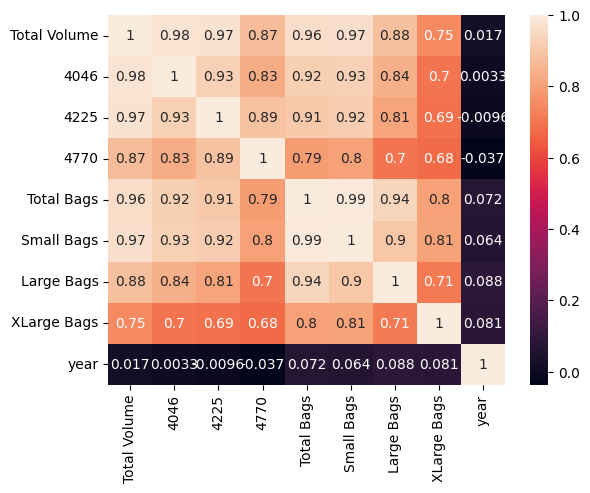

In [30]:
matrix = data_avacado.corr()
print("Correlation matrix : ") 
ax = sns.heatmap(matrix, annot=True)

- Skewness of every attribute.

In [31]:
columns_exclude = ["Date", "type", "year", "region"]
for i in data_avacado.columns:
    if(i not in columns_exclude):
        data = [val for val in data_avacado[i] if isinstance(val, (int, float))]
        mean = statistics.mean(data)
        median = statistics.median(data)
        stdev = statistics.stdev(data)
        skewness = 3*(mean-median)/stdev
        print(f"Attribute: {i}\nSkewness: {skewness}\n\n")

    else:
        print(f"Attribute: {i}\nIt is irrelevant to find skewness for this attribute\n\n")

Attribute: Date
It is irrelevant to find skewness for this attribute


Attribute: AveragePrice
Skewness: nan


Attribute: Total Volume
Skewness: 0.6456425499259214


Attribute: 4046
Skewness: 0.674369443121346


Attribute: 4225
Skewness: 0.6629398340184961


Attribute: 4770
Skewness: 0.632418886515869


Attribute: Total Bags
Skewness: 0.6080373957439429


Attribute: Small Bags
Skewness: 0.6265436371639136


Attribute: Large Bags
Skewness: 0.6356116083892682


Attribute: XLarge Bags
Skewness: 0.526709536331332


Attribute: type
It is irrelevant to find skewness for this attribute


Attribute: year
It is irrelevant to find skewness for this attribute


Attribute: region
It is irrelevant to find skewness for this attribute




## 9. Test drive the use of Gini Index, Information Gain, Entropy and other measures that are supported in your platform, performing the role of data selection

In [32]:
# Data Avacado 

def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))


arr = np.array([50, 50, 70, 70, 70, 90, 150, 150, 150, 150])

#calculate Gini coefficient for the array
print(f"Gini Index: {gini(arr)}")

ser = pd.Series(arr) 
probs = ser.value_counts(normalize=True) 
entropy = -1 * np.sum(np.log2(probs) * probs) 
print("Entropy: "+str(entropy))

def impurity(feature, impurityy): 
    probs = feature.value_counts (normalize=True) 
    if impurityy == 0 : 
        impurity = -1 * np.sum(np.log2 (probs) * probs) 
    elif impurityy == 1 : 
        impurity = 1 - np.sum(np.square(probs)) 
    else: raise ValueError('Unknown impurity criterion') 
    return(round(impurity, 3)) 

print('Impurity using entropy: ', impurity(ser, 0)) 
print('Impurity using gini index: ', impurity(ser, 1))

Gini Index: 0.226
Entropy: 1.8464393446710154
Impurity using entropy:  1.846
Impurity using gini index:  0.7


## 10. Test drive the implementation support in your platform of choice for data preprocessing phases such as cleaning, selection, transformation, integration in addition to the earlier exercises.

In [33]:
import pandas as pd

# Load the dataset 
df = data_trail

# Check for missing values
print("Missing Values: ")
print(df.isna().sum())

# Replace missing values with the mean
df.fillna(df.mean(), inplace=True)

# Check for outliers
print("Outliers")
# print(df.describe())
df.describe()


Missing Values: 
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
Outliers


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,2.020000e+02,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.0
mean,3.880581e+05,116505.295545,185573.742525,13310.929158,72668.132178,65821.463515,6816.628960,30.039703,2015.0
std,2.928727e+05,143629.927245,220320.773875,19938.752201,70294.964141,70123.074526,9813.199738,94.852824,0.0
min,4.050736e+04,629.460000,2546.090000,43.610000,3047.170000,1119.180000,0.000000,0.000000,2015.0
25%,7.410067e+04,26372.795000,17745.947500,305.625000,8978.807500,8458.167500,138.410000,0.000000,2015.0
50%,4.188855e+05,52768.310000,43962.730000,3014.400000,51714.755000,33857.165000,3283.400000,0.000000,2015.0
75%,6.371823e+05,234788.287500,407587.517500,18672.552500,115365.797500,113738.565000,9853.247500,7.760000,2015.0
max,1.007419e+06,553198.560000,745385.260000,83652.480000,249197.180000,244982.260000,52442.250000,873.610000,2015.0


In [34]:
# Remove outliers by filtering the data
df = df[df['4225'] < (407587 + (1.5*(407587 - 305)))]

# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_trail.csv", index=False)

In [35]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,22-11-2015,1.250000,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
4,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,20-09-2015,1.250000,498640.23,4376.74,398673.48,418.46,95171.55,91612.66,3558.89,0.0,conventional,2015,Boston
198,13-09-2015,1.250000,655682.95,5422.29,560792.23,353.77,89114.66,84843.55,4271.11,0.0,conventional,2015,Boston
199,06-09-2015,1.250000,577774.74,4237.44,477867.83,496.62,95172.85,94558.41,614.44,0.0,conventional,2015,Boston
200,30-08-2015,1.250000,526664.87,4177.03,438502.90,554.04,83430.90,83242.01,188.89,0.0,conventional,2015,Boston
